In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from ast import literal_eval

In [2]:
AirBnB = pd.read_csv("../data/original_data/Listings.csv", engine='python', encoding='ISO-8859-1')

In [3]:
AirBnB.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
AirBnB.shape

(279712, 33)

In [5]:
AirBnB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

`price` is our target column that we will want to try and predict. The rest of the columns are potential features.

Now let's look at the number and % of missing values in our dataset.

In [6]:
missing = pd.concat([AirBnB.isnull().sum(), 100 * AirBnB.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
district,242700,86.767818
host_response_time,128782,46.040928
host_response_rate,128782,46.040928
host_acceptance_rate,113087,40.429799
review_scores_value,91785,32.814109
review_scores_location,91775,32.810534
review_scores_checkin,91771,32.809104
review_scores_accuracy,91713,32.788368
review_scores_communication,91687,32.779073
review_scores_cleanliness,91665,32.771208


Looks like we are missing the majority (over 86%) of the `district` column. Since we have a `city`, a `neighbourhood` and coordinate columns (`latitude` and `longitude`), we should be able to safely drop the `district` column without losing much information. We are missing about a third of all the review related columns and over 40% and 46% of the `host_acceptance_rate` column and `host_response_rate` column (as well as `host_response_time` column) respectively. We will decide what we want to do with these columns/missing values in the future. We are not missing any of our target column, `price`, which is ideal.

In [7]:
AirBnB.district.value_counts()

Manhattan        16553
Brooklyn         14474
Queens            4704
Bronx              992
Staten Island      289
Name: district, dtype: int64

In [8]:
AirBnB.district.value_counts().sum()

37012

In [9]:
AirBnB[AirBnB['city'] == 'New York'].neighbourhood.value_counts()

Williamsburg          2733
Bedford-Stuyvesant    2711
Harlem                1972
Bushwick              1678
Hell's Kitchen        1506
                      ... 
Huguenot                 1
Woodrow                  1
Lighthouse Hill          1
Willowbrook              1
Castle Hill              1
Name: neighbourhood, Length: 220, dtype: int64

In [10]:
AirBnB[AirBnB['city'] == 'New York'].neighbourhood.value_counts().sum()

37012

With all of these districts being only in New York, we can definitely drop this column because it is not providing any extra information that isn't captured by the more specific `neighbourhood` column.

In [11]:
AirBnB = AirBnB.drop('district', axis=1)

Let's have a look at the rows of our dataframe and see if there are any duplicates.

In [12]:
#number of rows duplicated
AirBnB.duplicated().sum()

0

There are no rows that are completely duplicated. What if we ignore the `listing_id` column? 

In [13]:
#rows that are duplicated (except for first instance) when not including listing_id 
dup_rows = AirBnB[AirBnB.drop('listing_id', axis=1).duplicated()]
dup_rows.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
66632,47935047,Moderno depto con excelentes amenidades,368595849,2020-09-21,"Mexico City, Mexico City, Mexico",within an hour,1.0,0.93,t,5.0,...,5,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
103516,17971704,Triple room nicely located beside Sultanahmet,110791987,2017-01-10,TR,within an hour,1.0,1.00,f,9.0,...,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
103532,24661335,Family room nicely located beside Sultanahmet,110791987,2017-01-10,TR,within an hour,1.0,1.00,f,9.0,...,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
103533,24661423,Triple room nicely located beside Sultanahmet,110791987,2017-01-10,TR,within an hour,1.0,1.00,f,9.0,...,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
104081,24661841,Double room nicely located beside Sultanahmet,110791987,2017-01-10,TR,within an hour,1.0,1.00,f,9.0,...,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t


In [14]:
len(dup_rows)

27

In [15]:
#rows that are duplicated on specific columns (except for first instance) when not including listing_id 
partial_dup_rows = AirBnB[AirBnB.drop('listing_id', axis=1).duplicated(['name', 'host_id', 'latitude', 'longitude'])]
partial_dup_rows.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
39441,43517742,Super apartment Bastille/Voltaire MOBILITY LEASE,325882341,2020-01-09,FR,within a few hours,0.98,0.80,f,279.0,...,30,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
45214,39211052,Louvre - Richelieu: cosy flat for 2,50978178,2015-12-10,FR,within a few hours,0.73,0.94,f,155.0,...,1,1125,50.0,6.0,9.0,8.0,6.0,9.0,5.0,f
45219,39221386,Louvre - Richelieu: cosy flat for 2,50978178,2015-12-10,FR,within a few hours,0.73,0.94,f,155.0,...,1,1125,72.0,8.0,9.0,8.0,8.0,10.0,8.0,f
48233,41026321,Amazing apartment - 6P/2BR - Canal Saint Martin,319257358,2019-12-20,"Paris, Ile-de-France, France",within an hour,0.99,0.96,f,7.0,...,1,1125,92.0,9.0,9.0,8.0,9.0,10.0,9.0,t
53728,6671646,Central Apartment with 24/7 Concierge (1 guest),29087393,2015-03-10,"Rome, Lazio, Italy",NaN,NaN,NaN,f,9.0,...,1,1125,80.0,8.0,9.0,9.0,9.0,8.0,8.0,f


In [16]:
len(partial_dup_rows)

356

We can see that only 27 rows have the same information when not including the `listing_id` column. However, there are 356 columns where the name, host, latitude and longitude are the same. 

Since all of these rows have different listing ids, however, it is possible that they are listings that were taken down and put back up at a later date for whatever reason, and therefore given a new listing id. This could be from a customer making changes to the property and wanting to change the price while also not wanting old reviews to be associated with the listing. 

Therefore, I am  going to keep these rows since it won't really impact our models and they might be able to learn something from this customer behavior. 

Let's tackle the numeric features of our dataset.

In [17]:
AirBnB.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,279712.0,2.638196e+07,1.442576e+07,2577.00000,1.384462e+07,2.767098e+07,3.978485e+07,4.834353e+07
host_id,279712.0,1.081658e+08,1.108570e+08,1822.00000,1.720656e+07,5.826911e+07,1.832853e+08,3.901874e+08
host_response_rate,150930.0,8.659386e-01,2.837443e-01,0.00000,9.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,166625.0,8.271684e-01,2.892025e-01,0.00000,7.800000e-01,9.800000e-01,1.000000e+00,1.000000e+00
host_total_listings_count,279547.0,2.458161e+01,2.840411e+02,0.00000,1.000000e+00,1.000000e+00,4.000000e+00,7.235000e+03
latitude,279712.0,1.876186e+01,3.256034e+01,-34.26440,-2.296439e+01,4.071079e+01,4.190861e+01,4.890491e+01
longitude,279712.0,1.259508e+01,7.308131e+01,-99.33963,-4.319804e+01,2.382780e+00,2.898673e+01,1.513398e+02
accommodates,279712.0,3.288736e+00,2.133379e+00,0.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,250277.0,1.515509e+00,1.153080e+00,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01
price,279712.0,6.087927e+02,3.441827e+03,0.00000,7.500000e+01,1.500000e+02,4.740000e+02,6.252160e+05


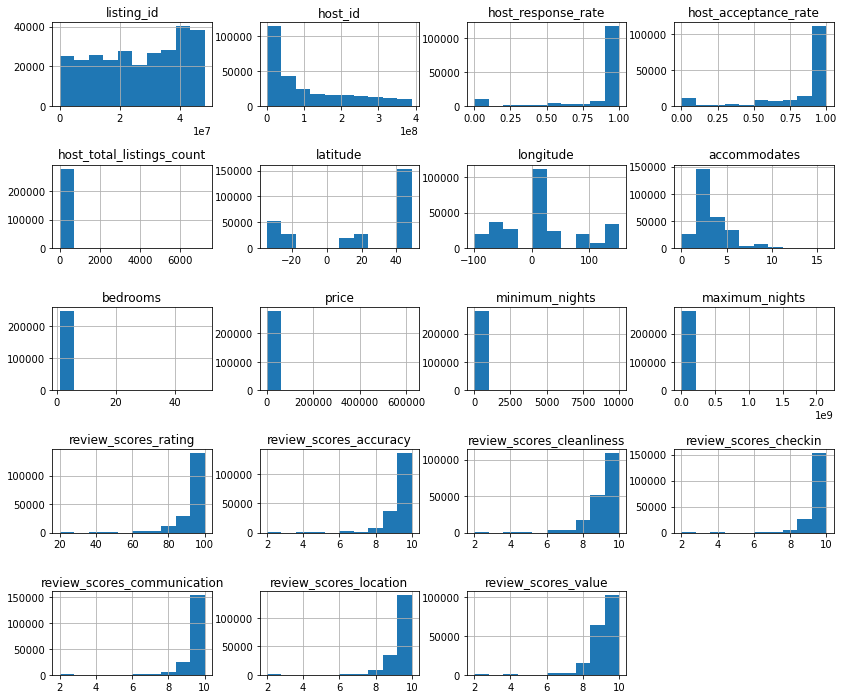

In [18]:
AirBnB.hist(figsize = (14,12))
plt.subplots_adjust(hspace=0.7);

The histogram for the following features are a little concerning:
- `host_acceptance_rate` looks like there could be some 0 values which we should look into,
- `host_total_listings_count` because values are clustered down the lower end,
- `bedrooms` for the same reason,
- `minimum_nights` for the same reason,
- `maximum_nights` for the same reason but also because there could be some 0 values which would not make sense,
- `price` for the same reason. This column is most worrying because it is our target variable.

In [19]:
AirBnB.host_acceptance_rate.describe()

count    166625.000000
mean          0.827168
std           0.289202
min           0.000000
25%           0.780000
50%           0.980000
75%           1.000000
max           1.000000
Name: host_acceptance_rate, dtype: float64

In [20]:
AirBnB.host_acceptance_rate[AirBnB.host_acceptance_rate == 0].count()

11431

In [21]:
AirBnB.host_acceptance_rate.value_counts()

1.00    75555
0.00    11431
0.99     7227
0.50     5445
0.98     5085
        ...  
0.05       28
0.01       25
0.21       23
0.02       14
0.16        4
Name: host_acceptance_rate, Length: 101, dtype: int64

In [22]:
print("median host acceptance rate: %.2f" %AirBnB.host_acceptance_rate.median())
print("mean host acceptance rate: %f" %AirBnB.host_acceptance_rate.mean())

median host acceptance rate: 0.98
mean host acceptance rate: 0.827168


In [23]:
print("median host acceptance rate not including 0 values: %.2f" %AirBnB.host_acceptance_rate[AirBnB.host_acceptance_rate > 0].median())
print("mean host acceptance rate not including 0 values: %f" %AirBnB.host_acceptance_rate[AirBnB.host_acceptance_rate > 0].mean())

median host acceptance rate not including 0 values: 0.99
mean host acceptance rate not including 0 values: 0.888095


In [24]:
AirBnB[AirBnB.host_acceptance_rate == 0].head().T

,10720,10721,10722,10725,10726
listing_id,739559,1282556,1455666,3276771,3758451
name,Nice studio in Montmartre,Penthouse with view and terrace,Typical French flat - Bastille 50m2,"CHARMING 2 ROOMS. MONTMARTRE, 35m2",Magnifique appartement Lumineux & Calme
host_id,2638478,6977773,5547857,16565834,9498528
host_since,2012-06-14,2013-06-18,2013-03-20,2014-06-09,2013-10-18
host_location,"Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France"
host_response_time,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,0.0,0.0,0.0,0.0,0.0
host_is_superhost,f,f,f,f,f
host_total_listings_count,1.0,1.0,1.0,1.0,1.0


`host_acceptance_rate` is the rate at which a host accepts a booking request when one it submitted before it times out (24 hours). If a host has a `host_acceptance_rate` of 0, then they have either not accepted any bookings or haven't received any bookings. The model could potentially learn something from this behavior so we will leave it as is.

Moving on to `host_total_listing_count`:

In [25]:
AirBnB.host_total_listings_count.describe()

count    279547.000000
mean         24.581612
std         284.041143
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        7235.000000
Name: host_total_listings_count, dtype: float64

In [26]:
AirBnB.host_total_listings_count[AirBnB.host_total_listings_count > 1000].value_counts()

7235.0    349
1337.0    268
1105.0    215
1005.0    188
1020.0     77
1813.0     66
1318.0     46
7218.0     43
1163.0     24
1507.0     13
2739.0     13
1449.0      7
1515.0      6
1827.0      5
1338.0      5
7211.0      4
1324.0      2
1360.0      1
Name: host_total_listings_count, dtype: int64

In [27]:
AirBnB[AirBnB.host_total_listings_count == 7235].head().T

,159638,159639,159665,159667,167765
listing_id,47046640,47046658,47817397,47818764,45173663
name,Exquisite Triple Standard At St. Leonards,Nice Triple Standard At St. Leonards,Immaculate Single Standard At Via Veneto,Firstclass Double Single Use Standard At Vaticano,Intimate Double Bed At Mascot - Sydney Airport
host_id,175128252,175128252,175128252,175128252,175128252
host_since,2018-02-24,2018-02-24,2018-02-24,2018-02-24,2018-02-24
host_location,"London, England, United Kingdom","London, England, United Kingdom","London, England, United Kingdom","London, England, United Kingdom","London, England, United Kingdom"
host_response_time,within an hour,within an hour,within an hour,within an hour,within an hour
host_response_rate,1.0,1.0,1.0,1.0,1.0
host_acceptance_rate,0.99,0.99,0.99,0.99,0.99
host_is_superhost,f,f,f,f,f
host_total_listings_count,7235.0,7235.0,7235.0,7235.0,7235.0


Very large jump from 2739 to over 7000 listings. Even over a 1000 listings seems very large but it's not implausible for a company to have many properties listed on AirBnB (and some of the listings could be the same property as we have seen before).

Let's check `bedrooms` now:

In [28]:
AirBnB.bedrooms.describe()

count    250277.000000
mean          1.515509
std           1.153080
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          50.000000
Name: bedrooms, dtype: float64

In [29]:
#check to see if there are any listings with 0 bedrooms
AirBnB.bedrooms[AirBnB.bedrooms == 0].count()

0

In [30]:
#checking for listings with more than 20 bedrooms
AirBnB.bedrooms[AirBnB.bedrooms > 20].value_counts()

50.0    22
40.0    10
22.0     5
30.0     4
23.0     4
24.0     4
33.0     3
31.0     2
39.0     2
38.0     2
46.0     2
21.0     2
35.0     2
26.0     1
25.0     1
34.0     1
42.0     1
41.0     1
48.0     1
Name: bedrooms, dtype: int64

In [31]:
#looking at listings with 50 bedrooms and how many people they accommodate
AirBnB[AirBnB.bedrooms == 50][['name','price', 'accommodates']]

,name,price,accommodates
44226,Ã¢ÅÂ¯ Amazing Midtown Suites for Home Office ...,3614,16
91807,BeylikdÃÂ¼zÃÂ¼nde ki eviniz.,214,16
92133,Ã¢ÅÂ¯ MASTER SUITES PRIME LOCATION Ã¢ÅÂ¯,1832,16
95290,Grand Ã Å¾ile Hotel,521,2
96185,Suite sencilla,600,2
96619,Ã¢ÂÂ¤ 25 SUITES - HOME OFFICE FOR COMPANY STA...,1858,16
97284,Kentin merkezinde tarihi yasayin...,100,1
97285,Tarihi surlar icinde sehrin tadini cikarin !!!,180,2
97294,Tarihi surlar icinde kenti yaÃ Å¸ayÃÂ±n!!!!,120,16
97365,Luxury villas at the beach,3000,16


In [32]:
AirBnB.accommodates.max()

16

Despite there being many listiings with over 20 bedrooms, the maximum number of guests that can be accomodated is 16. This could either be an error/limitation on the website or the listing refers to the number of guests that are allowed to book but the number of bedrooms is the total number of bedrooms for the property (the expected case for a hotel for example). 

Let's check the `minimum_nights` and `maximum_nights` next:

In [33]:
AirBnB.minimum_nights.describe()

count    279712.000000
mean          8.050967
std          31.518946
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        9999.000000
Name: minimum_nights, dtype: float64

<AxesSubplot:>

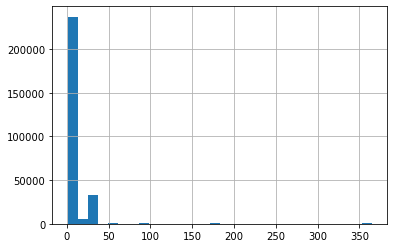

In [34]:
AirBnB.minimum_nights[AirBnB.minimum_nights <= 365].hist(bins=30)

In [35]:
#look at value counts for the number of listings with minimum_nights over 2 years
AirBnB.minimum_nights[AirBnB.minimum_nights > 730].value_counts()

1000    31
1124     3
1125     3
999      3
1001     1
1100     1
1112     1
1123     1
9999     1
1250     1
Name: minimum_nights, dtype: int64

In [36]:
#checking the listing with a minimum nights value of 9999
AirBnB[AirBnB.minimum_nights == 9999].T

,180165
listing_id,8179304
name,Chambre Autonome Paris Centre pour2
host_id,43159413
host_since,2015-09-02
host_location,"Paris, Ile-de-France, France"
host_response_time,NaN
host_response_rate,NaN
host_acceptance_rate,NaN
host_is_superhost,f
host_total_listings_count,1.0


Some of these values (other than the 9999) seem possible but unlikely. Could bump up the years to 3 and scale any listing with `minimum_nights` over that value down to 3 years.

In [37]:
#changes values in the minimum_nights column to 1095 if they are over 1095
AirBnB['minimum_nights'] = np.where(AirBnB['minimum_nights'] > 1095 , 1095, AirBnB['minimum_nights'])

In [38]:
AirBnB.minimum_nights[AirBnB.minimum_nights > 730].value_counts()

1000    31
1095    11
999      3
1001     1
Name: minimum_nights, dtype: int64

In [39]:
AirBnB.maximum_nights.describe()

count    2.797120e+05
mean     2.755860e+04
std      7.282875e+06
min      1.000000e+00
25%      4.500000e+01
50%      1.125000e+03
75%      1.125000e+03
max      2.147484e+09
Name: maximum_nights, dtype: float64

In [40]:
AirBnB.maximum_nights.min()

1

No 0 values for `maximum_nights` which was the main concern. Top 75% of the values are 1125 nights or less.

In [41]:
AirBnB.maximum_nights[AirBnB.maximum_nights > 1125].value_counts()

1825          15
9999          11
2000          10
1126           9
10000          8
3000           6
5000           5
30000          4
1200           4
2147483647     3
10000000       3
50000          3
99999          3
2100           2
3600           2
1127           2
20000000       2
1500           2
100000         1
1400           1
2500           1
3333           1
3500           1
1224           1
1148           1
22222          1
1250           1
1460           1
6000           1
1128           1
999999999      1
471000         1
47036          1
3659           1
7000           1
2800           1
1162           1
1225           1
200000         1
999999         1
1240           1
1222           1
1918           1
1195           1
1165           1
85554          1
1800           1
Name: maximum_nights, dtype: int64

Some of these values are abnormally large and after a certain point aren't really giving any additional information. If the `maximum_nights` is over 3650 nights then that's 10 years. After that point, is the number still relevant? 

In [42]:
AirBnB.maximum_nights[AirBnB.maximum_nights > 3650].value_counts()

9999          11
10000          8
5000           5
30000          4
50000          3
2147483647     3
10000000       3
99999          3
20000000       2
85554          1
999999         1
200000         1
47036          1
7000           1
3659           1
22222          1
471000         1
100000         1
6000           1
999999999      1
Name: maximum_nights, dtype: int64

In [43]:
#changes values in the maximum_nights column to 10,000 if they are over 10,000
AirBnB['maximum_nights'] = np.where(AirBnB['maximum_nights'] > 10000 , 10000, AirBnB['maximum_nights'])

Decided to use 10,000 as the cuttoff point after looking at the counts of each value over 3650. 

In [44]:
AirBnB.maximum_nights[AirBnB.maximum_nights > 3650].value_counts()

10000    34
9999     11
5000      5
7000      1
3659      1
6000      1
Name: maximum_nights, dtype: int64

Let's now turn our attention to the most important column: `price`, our target variable. 

In [45]:
AirBnB.price.describe()

count    279712.000000
mean        608.792737
std        3441.826611
min           0.000000
25%          75.000000
50%         150.000000
75%         474.000000
max      625216.000000
Name: price, dtype: float64

The standard deviation is very high and the mean lies inside the upper quartile of the data and is over 4 times larger than the median. This suggests that there are some very large prices skewing the data.

In [46]:
AirBnB[AirBnB.price == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,113.0,4.372732e+07,1.470117e+06,4.056066e+07,4.258340e+07,4.323354e+07,4.469471e+07,4.716961e+07
host_id,113.0,3.222249e+08,5.748754e+07,7.635103e+07,3.104208e+08,3.333708e+08,3.619145e+08,3.810409e+08
host_response_rate,32.0,9.937500e-01,3.535534e-02,8.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,48.0,9.837500e-01,3.641516e-02,8.600000e-01,9.900000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_total_listings_count,113.0,1.398230e+00,2.848997e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.600000e+01
latitude,113.0,3.975622e+01,1.800438e+01,-2.300065e+01,4.074459e+01,4.884045e+01,4.886246e+01,4.889659e+01
longitude,113.0,-2.381069e+01,4.055049e+01,-9.919296e+01,-7.398005e+01,2.304030e+00,2.339470e+00,1.005642e+02
accommodates,113.0,8.230088e-01,1.553970e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
bedrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,113.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


All of the listings with a `price` of 0 have null values for the number of `bedrooms` and reviews scores. Also,  0 isn't a realistic listing price because no one is renting out rooms for free and we don't want our model to predict a 0 price. There are 113 such listings that we will remove due to this. 

In [47]:
zero_price_index = AirBnB[AirBnB.price == 0].index
AirBnB = AirBnB.drop(index=zero_price_index)

After looking online, the most expensive Airbnb listing I could find was for just under $37,600 a night. 

In [48]:
high_price_listings = AirBnB.price[AirBnB.price > 37600]
high_price_listings.count()

231

In [49]:
high_price_listings.count() / len(AirBnB)

0.0008261832123863104

We have 231 listings with a price over this amount which is roughly 0.08% of all our listings.

In [50]:
AirBnB.price[AirBnB.price >= 37600].value_counts()

50000     25
100000    12
45000      9
60000      7
89575      6
          ..
180124     1
39990      1
157500     1
95714      1
160000     1
Name: price, Length: 131, dtype: int64

Some of these litings have absurdly large prices and since the largest price I could find online was $37,600 a night, I feel comfortable dropping the listings with prices higher than this.

In [51]:
AirBnB = AirBnB.drop(index=high_price_listings.index)

<AxesSubplot:>

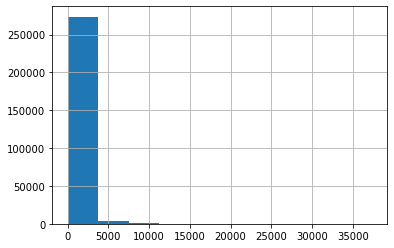

In [52]:
AirBnB.price.hist()

Let's have a look at the Categorical features now.

In [53]:
AirBnB.select_dtypes('object').head().T

,0,1,2,3,4
name,"Beautiful Flat in le Village Montmartre, Paris",39 mÃÂ² Paris (Sacre CÃ âur),"Lovely apartment with Terrace, 60m2",Cosy studio (close to Eiffel tower),Close to Eiffel Tower - Beautiful flat : 2 rooms
host_since,2011-12-03,2013-11-29,2014-07-31,2013-12-17,2014-12-14
host_location,"Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France"
host_response_time,NaN,NaN,NaN,NaN,NaN
host_is_superhost,f,f,f,f,f
host_has_profile_pic,t,t,t,t,t
host_identity_verified,f,t,f,t,f
neighbourhood,Buttes-Montmartre,Buttes-Montmartre,Elysee,Vaugirard,Passy
city,Paris,Paris,Paris,Paris,Paris
property_type,Entire apartment,Entire apartment,Entire apartment,Entire apartment,Entire apartment


Want to extract some information from the `amenities` column. Like how many amenities the listing offers and making new columns for specific amenities and whether or not a listing has them or not. 

In [54]:
#convert amenities column from string to list
AirBnB['amenities'] = AirBnB['amenities'].apply(literal_eval)

In [55]:
#create new column showing the number of different amenities the listing offers
AirBnB['number_of_amenities'] = AirBnB['amenities'].apply(len)

<AxesSubplot:>

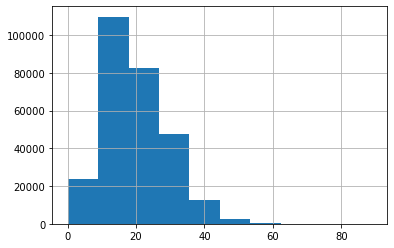

In [56]:
AirBnB.number_of_amenities.hist()

In [59]:
#create a list of all the unique amenities offered between all listings
unique_amenities = []
for lists in AirBnB.amenities:
    for i in lists:
        if i not in unique_amenities:
            unique_amenities.append(i)

In [61]:
len(unique_amenities)

3253

In [69]:
unique_amenities_short = []
for i in unique_amenities:
    if len(i) <= 10:
        unique_amenities_short.append(i)

In [71]:
unique_amenities_short

['Heating',
 'Kitchen',
 'Washer',
 'Wifi',
 'Shampoo',
 'Essentials',
 'Dryer',
 'TV',
 'Hair dryer',
 'Bathtub',
 'Elevator',
 'Cable TV',
 'Iron',
 'Hot water',
 'Hangers',
 'Dishwasher',
 'Stove',
 'Oven',
 'Bed linens',
 'Breakfast',
 'Microwave',
 'Lockbox',
 'Freezer',
 'Shower gel',
 'Crib',
 'High chair',
 'Baby bath',
 'Hot tub',
 'Keypad',
 'Piano',
 'BBQ grill',
 'Gym',
 'Pool',
 'Body soap',
 'Rice maker',
 'Waterfront',
 'EV charger',
 'Smart lock',
 'Toaster',
 'Beachfront',
 'Bidet',
 'Gas stove',
 'HDTV',
 'Sauna',
 'Safe',
 'Bikes',
 '43" HDTV',
 'Defy oven',
 '55" TV',
 'Teca oven',
 'Pool table',
 '55" HDTV',
 '32" HDTV',
 '51" HDTV',
 'Boat slip',
 '92" HDTV',
 'Fire pit',
 'Smeg oven',
 '40" TV',
 '47" HDTV',
 'Pool cover',
 '32" TV',
 'SMEG oven',
 'MIELE oven',
 '81" TV',
 'Gás oven',
 'Shared gym',
 '28" HDTV',
 '42" HDTV',
 '56" HDTV',
 '50" HDTV',
 'Bosch oven',
 '30" HDTV',
 'bosch oven',
 'Netflix',
 'Chef oven',
 'Smart TV',
 'Wet bar',
 '40" HDTV',
 'Pool

In [87]:
#adding columns to our dataframe corresponding to whether the amenities column contains a specific amenity or not
amens = ['Heating', 'Kitchen', 'Wifi', 'Washer', 'Dryer', 'TV', 'Pool', 'Hot water', 'Hot tub', 'Bed linens', 'Gym', 'Waterfront', 'Beachfront', 'HDTV', 'Parking']
for amen in amens:
    AirBnB[amen] = AirBnB['amenities'].apply(lambda c: amen in c)

In [90]:
AirBnB.head().T

,0,1,2,3,4
listing_id,281420,3705183,4082273,4797344,4823489
name,"Beautiful Flat in le Village Montmartre, Paris",39 mÃÂ² Paris (Sacre CÃ âur),"Lovely apartment with Terrace, 60m2",Cosy studio (close to Eiffel tower),Close to Eiffel Tower - Beautiful flat : 2 rooms
host_id,1466919,10328771,19252768,10668311,24837558
host_since,2011-12-03,2013-11-29,2014-07-31,2013-12-17,2014-12-14
host_location,"Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France","Paris, Ile-de-France, France"
host_response_time,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,NaN,NaN,NaN,NaN
host_acceptance_rate,NaN,NaN,NaN,NaN,NaN
host_is_superhost,f,f,f,f,f
host_total_listings_count,1.0,1.0,1.0,1.0,1.0


Chose specific amenities to check for in listing that I thought might have some affect on the price of the listing based on domain knowledge and personal beliefs.